# **Support Vector Machine Algorithm**
* Support Vector Machine or SVM is one of the most popular supervised learning algorithms, which is used for Classification as well as Regression problems.
* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so it is easly put the new data point in the correct category in the future. This best decision boundary is called a **hyperplane**.
* SVMs use a boundary called a hyperplane to partition data into groups of similar class values in two and three dimensions
*  If the data points can be separated perfectly by the straight line or flat surface, they are said to be **linearly separable**.


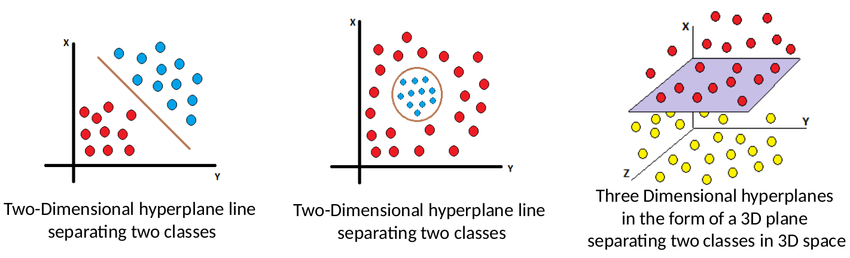


* In two dimensions, the task of the SVM algorithm is to identify a line that separates the two classes.
* There is more than one choice of dividing line between the groups of circles and squares. Three such possibilities are labeled a, b, and c.

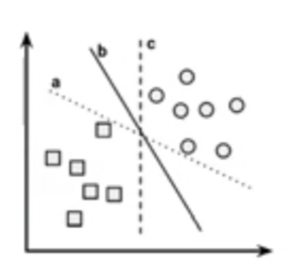

* SVM algorithm will choose **Maximum Margin Hyperplane (MMH)** that creates the greatest separation between the two classes.
* Although any Of the three lines separating the circles and squares would correctly classify all the data points, it is likely that the line that leads to the greatest separation generalize the best to the future data.
* The maximul margin will improve the chance that, in spite of random noise, the pints will remain on the correct side of the boundary.

* The support vectors are the points from each class that are the closest to the MMH; each class must have at least one support vector, but it is possible to have more than one.
* Using the support vectors alone, it is possible to define the MMH. This is a key feature of SVMs; the support vectors provide a very compact way to store a classification model, even if the number of features is extremely large.

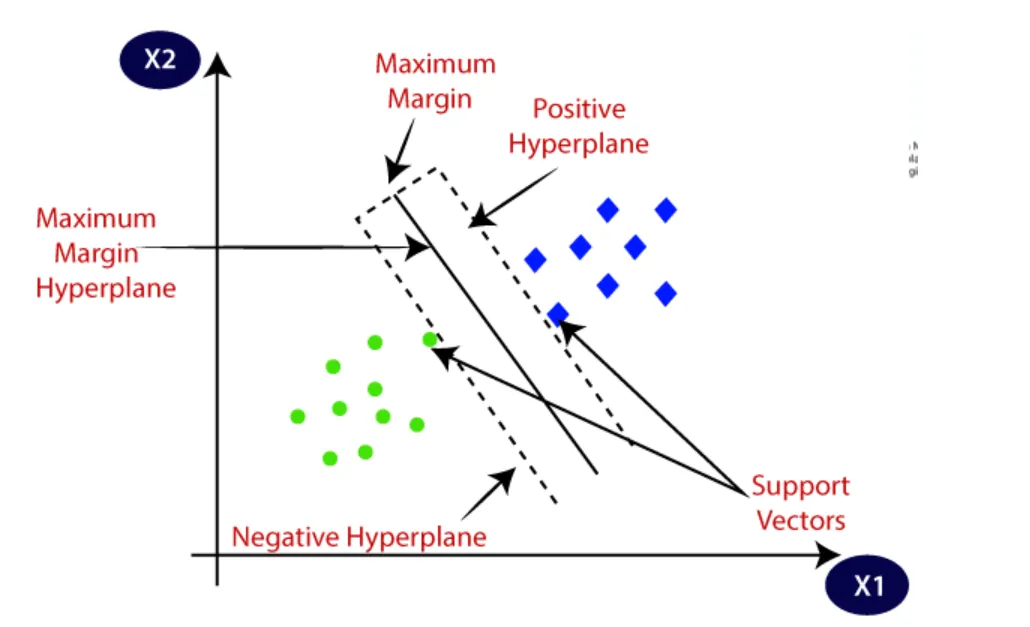

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Algorithms/SVM/Copy of diabetes.csv")

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
x = df.iloc[:,:8]
y = df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 2)

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [40]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [42]:
y_pred = svc.predict(x_test)

In [43]:
# training score
svc.score(x_train, y_train)

0.8306188925081434

In [44]:
# testing score
svc.score(x_test, y_test)

0.7532467532467533

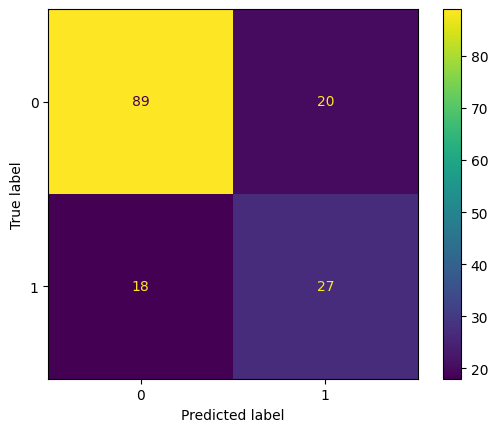

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd, confusion_matrix as cm
cmd(cm(y_test, y_pred)).plot()

In [46]:
from sklearn.metrics import accuracy_score as asc
asc(y_test, y_pred)

0.7532467532467533

In [47]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.57      0.60      0.59        45

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154

